# Real Estate Data Analysis – ImmoEliza

## Project Overview

The goal of this challenge is to support the real estate company *ImmoEliza* in its ambition to become the leading real estate player in Belgium. To do so, the company needs a strong pricing strategy based on data.

Before building a machine learning model, we will perform a thorough data analysis to:

- Understand the structure and content of the dataset
- Clean and prepare the data
- Extract key insights for business decision-making
- Visualize patterns and trends in the Belgian real estate market

This project is carried out as part of the `challenge-data-analysis`.

## Team Members
- [Evi]
- [Moussa]
- [Yves]

## Notebook Structure
1. Data loading and exploration  
2. Data cleaning  
3. Exploratory data analysis (EDA)  
4. Guided analysis and visual questions  
5. Interpretation and business insights  
6. Optional bonus visualizations  
7. Export and documentation  

# 1. Data loading and exploration  
- 1.1. Import Required Libraries
- 1.2. Load the Dataset
- 1.3. First Glance at the Data
  - Dataset shape
  - Column names
  - Data types
  - First rows (`.head()`)

## 1.1. Import Required Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

## 1.2. Load the Dataset


In [3]:
csv_path = "../data/immoweb_real_estate.csv"
df = pd.read_csv(csv_path)

## 1.3. First Glance at the Data
  - Dataset shape
  - Column names
  - Data types
  - First rows (`.head()`)

In [4]:
# Display dataset shape: number of rows and columns
print("Dataset shape:", df.shape)

# Display column names
print("\nColumn names:")
print(df.columns.tolist())

# Display data types
print("\nData types:")
print(df.dtypes)

# Display the first 5 rows
df.head()

Dataset shape: (80368, 53)

Column names:
['Unnamed: 0', 'id', 'url', 'type', 'subtype', 'bedroomCount', 'bathroomCount', 'province', 'locality', 'postCode', 'habitableSurface', 'roomCount', 'monthlyCost', 'hasAttic', 'hasBasement', 'hasDressingRoom', 'diningRoomSurface', 'hasDiningRoom', 'buildingCondition', 'buildingConstructionYear', 'facedeCount', 'floorCount', 'streetFacadeWidth', 'hasLift', 'floodZoneType', 'heatingType', 'hasHeatPump', 'hasPhotovoltaicPanels', 'hasThermicPanels', 'kitchenSurface', 'kitchenType', 'landSurface', 'hasLivingRoom', 'livingRoomSurface', 'hasBalcony', 'hasGarden', 'gardenSurface', 'gardenOrientation', 'parkingCountIndoor', 'parkingCountOutdoor', 'hasAirConditioning', 'hasArmoredDoor', 'hasVisiophone', 'hasOffice', 'toiletCount', 'hasSwimmingPool', 'hasFireplace', 'hasTerrace', 'terraceSurface', 'terraceOrientation', 'accessibleDisabledPeople', 'epcScore', 'price']

Data types:
Unnamed: 0                    int64
id                          float64
url 

,Unnamed: 0,id,url,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,...,hasOffice,toiletCount,hasSwimmingPool,hasFireplace,hasTerrace,terraceSurface,terraceOrientation,accessibleDisabledPeople,epcScore,price
0,0,20661494.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,True,7.0,NaN,NaN,C,399000.0
1,1,20647642.0,https://www.immoweb.be/en/classified/house/for...,HOUSE,HOUSE,4.0,2.0,Brussels,Etterbeek,1040,...,True,3.0,NaN,NaN,True,1.0,NaN,NaN,E,895000.0
2,2,20644816.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,True,2.0,NaN,NaN,F,465000.0
3,3,20659813.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,2.0,Brussels,Bruxelles,1040,...,NaN,2.0,NaN,NaN,True,3.0,NaN,NaN,B,590000.0
4,4,20633249.0,https://www.immoweb.be/en/classified/flat-stud...,APARTMENT,FLAT_STUDIO,1.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,E,289000.0


# 2. Data cleaning 
- 2.1. Remove Duplicates
- 2.2. Handle Missing Values
- 2.3. Clean Whitespace and Fix Formatting
- 2.4. Save Cleaned Dataset (Optional)

## 2.1. Remove Duplicates

In [5]:
print(f"Rows before duplicate removal: {len(df)}")
df = df.drop_duplicates()
print(f"Remaining rows after duplicate removal: {len(df)}")

Rows before duplicate removal: 80368
Remaining rows after duplicate removal: 80368


## 2.2. Handle Missing Values
- 2.2.1 Display Count of Missing Values per Column
- 2.2.2. Show Percentage of Missing Values
- 2.2.3. Save new dataset with missing values removed 
  - Drop columns with more than 50% missing values
  - Drop remaining rows with any missing value

### 2.2.1 Display Count of Missing Values per Column

In [6]:
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)
print("Missing values per column:\n", missing_counts)

Missing values per column:
 accessibleDisabledPeople    80368
hasBalcony                  80368
monthlyCost                 80368
hasAirConditioning          79244
hasSwimmingPool             78552
hasDressingRoom             77740
hasFireplace                77324
hasThermicPanels            77256
hasArmoredDoor              76670
gardenOrientation           74767
diningRoomSurface           73467
hasHeatPump                 72895
hasPhotovoltaicPanels       72320
hasOffice                   69981
terraceOrientation          69106
hasAttic                    67852
hasDiningRoom               66227
streetFacadeWidth           64858
gardenSurface               64410
hasGarden                   64410
hasVisiophone               64377
parkingCountOutdoor         62042
hasLift                     61324
roomCount                   58420
kitchenSurface              56105
parkingCountIndoor          52129
terraceSurface              51769
livingRoomSurface           51418
hasBasement         

### 2.2.2. Show Percentage of Missing Values

In [7]:
missing_percentage = (df.isnull().mean() * 100).sort_values(ascending=False)
print("Percentage of missing values:\n", missing_percentage[missing_percentage > 0])

Percentage of missing values:
 accessibleDisabledPeople    100.000000
hasBalcony                  100.000000
monthlyCost                 100.000000
hasAirConditioning           98.601433
hasSwimmingPool              97.740394
hasDressingRoom              96.730042
hasFireplace                 96.212423
hasThermicPanels             96.127812
hasArmoredDoor               95.398666
gardenOrientation            93.030808
diningRoomSurface            91.413249
hasHeatPump                  90.701523
hasPhotovoltaicPanels        89.986064
hasOffice                    87.075702
terraceOrientation           85.986960
hasAttic                     84.426637
hasDiningRoom                82.404688
streetFacadeWidth            80.701274
gardenSurface                80.143838
hasGarden                    80.143838
hasVisiophone                80.102777
parkingCountOutdoor          77.197392
hasLift                      76.304002
roomCount                    72.690623
kitchenSurface               69.8

#### Observations
- **Very high missingness** (>95%) in features such as `accessibleDisabledPeople`, `hasBalcony`, `monthlyCost`, and several others (e.g., `hasAirConditioning`, `hasSwimmingPool`) — likely optional or luxury-related fields. These should be dropped or carefully imputed only if essential.
- **High missingness** (80–95%) in features such as `gardenSurface`, `streetFacadeWidth`, `hasDiningRoom`, `hasAttic` — consider converting to binary flags or imputing selectively if they enhance model performance.
- **Moderate missingness** (40–80%) in important structural or spatial attributes like `roomCount`, `kitchenSurface`, `terraceSurface`, `livingRoomSurface`, `landSurface`, `hasBasement`, and `hasTerrace` — suitable candidates for imputation using medians or predictive models.
- **Low to moderate missingness** (10–40%) in features such as `floorCount`, `kitchenType`, `heatingType`, `buildingConstructionYear`, `buildingCondition`, and `epcScore` — many of these are important and can be imputed or flagged.
- **Low missingness** (<10%) in `bedroomCount`, `price`, `habitableSurface`, and `bathroomCount` — essential for pricing models and straightforward to impute.

#### Column-by-Column Recommendations
| Column                     | Missing % | Recommendation |
|----------------------------|------------|----------------|
| `accessibleDisabledPeople` | 100.0%     | Drop — no usable data. |
| `hasBalcony`               | 100.0%     | Drop or convert to `has_balcony` flag if imputation possible. |
| `monthlyCost`              | 100.0%     | Drop — unusable without recovery. |
| `hasAirConditioning`       | 98.6%      | Drop or impute with flag; likely luxury feature. |
| `hasSwimmingPool`          | 97.7%      | Drop or binary flag — rarely present. |
| `gardenSurface`            | 80.1%      | Impute with model (correlates with `hasGarden`, `landSurface`). |
| `hasGarden`                | 80.1%      | Create `has_garden` flag if useful — otherwise drop. |
| `roomCount`                | 72.7%      | Important — impute with median or model. |
| `terraceSurface`           | 64.4%      | Predictive imputation — strong influence on price. |
| `livingRoomSurface`        | 64.0%      | Impute using correlated surface features. |
| `landSurface`              | 50.8%      | Keep and impute — important for houses. |
| `kitchenType`              | 47.8%      | Categorical — impute with `"unknown"` or mode. |
| `heatingType`              | 41.3%      | Impute with mode or group-based frequency. |
| `hasTerrace`               | 41.0%      | Create binary flag if useful. |
| `buildingConstructionYear`| 38.9%      | Impute with median — valuable for age analysis. |
| `epcScore`                 | 18.6%      | Impute — energy rating relevant in pricing. |
| `bathroomCount`            | 17.0%      | Impute with median. |
| `habitableSurface`         | 15.7%      | Essential — impute with care. |
| `bedroomCount`             | 8.5%       | Critical — simple imputation acceptable. |
| `price`                    | 5.0%       | Drop rows with missing price — cannot model without target. |

#### Strategic Considerations
- For **machine learning** workflows:
  - Drop completely empty columns.
  - Convert optional features into binary indicators (e.g., `has_garden`, `has_swimming_pool`).
  - Impute core attributes (e.g., surfaces, counts) using median, KNN, or regression models.
  - Avoid imputation on the target variable `price`; drop those rows instead.

- For **BI/dashboard reporting**:
  - Represent missing values clearly (e.g., `"unknown"`, `"not available"`).
  - Keep user expectations in mind when interpreting incomplete fields.

#### Next Steps
- Visualize missingness with tools such as seaborn's heatmap or missingno.
- For each feature, decide whether to **drop**, **impute**, or **transform**.
- Document and version all preprocessing decisions for reproducibility.

### 2.2.3 Visualize Missingness

Visual representations of missing values help detect patterns across the dataset:

- A **heatmap** shows missing entries row by row, which can highlight clusters or anomalies.
- A **bar plot** (via `missingno`) summarizes the missing value count per feature, sorted for easier prioritization.

These visualizations support decision-making when choosing which columns to drop, impute, or transform.


#### Approach 1 – Heatmap using seaborn

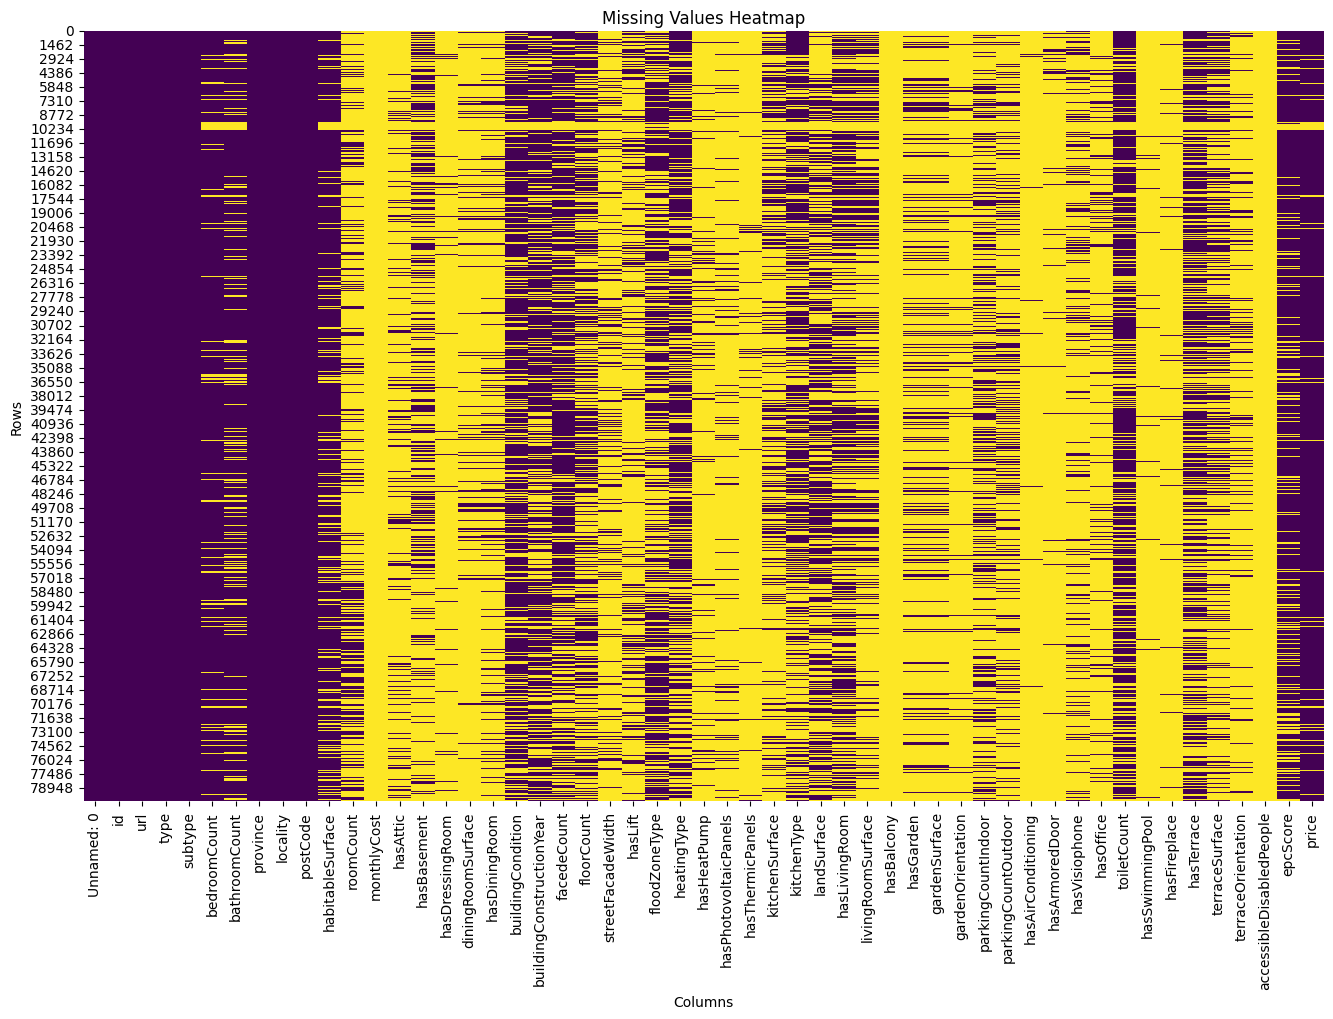

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of missing values
plt.figure(figsize=(16, 10))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

### Missing Values Heatmap – Detailed Interpretation

This heatmap, created using `seaborn`, visualizes missing values (`NaN`) across the dataset:

- **Color Coding:**
  - **Yellow** = missing value
  - **Purple** = observed (non-missing) value

#### Key Observations
- **Entirely missing columns** such as `accessibleDisabledPeople`, `hasBalcony`, and `monthlyCost` are fully yellow, confirming they should be **dropped** from the dataset.
- A large number of features show **over 60–90% missing values**, particularly attributes like:
  - `hasSwimmingPool`, `hasDressingRoom`, `hasThermicPanels`, `gardenSurface`, etc.
  - These may represent rare or optional features, and should be imputed only if relevant to model performance.
- **Core features** like `price`, `bedroomCount`, `bathroomCount`, and `habitableSurface` are mostly purple, indicating good data quality for primary predictive modeling.
- Some columns show **mixed patterns**, which may hint at conditional missingness:
  - For example, `gardenSurface` is often missing when `hasGarden` is also missing — suggesting feature dependency.
  - Similarly, `terraceSurface` may be missing only when `hasTerrace` is False or missing.

#### Usefulness of the Heatmap
- The heatmap helps visually **identify:
  - Which features are consistently problematic (drop or flag),
  - Where missing values might align across rows (entire records to drop),
  - Which missing patterns are possibly structured (e.g., depending on property type or region).

#### Next Actions
- Cross-reference this heatmap with the percentage table of missing values.
- Document each column's strategy: **Drop**, **Impute**, or **Transform**.
- Consider advanced tools (e.g., `missingno`, correlation matrix of missing values) to analyze interdependencies between features.

This visualization provides a solid foundation for cleaning and engineering the dataset in preparation for modeling or BI use.



### Approach 2 - Matrix View

The matrix plot provides a detailed overview of the distribution and alignment of missing values across the dataset.
- Each row represents an individual observation (listing).
- Vertical white lines = missing values.
- Solid vertical bars = complete data in that column.
- A sparkline at the bottom shows data density across rows.

<Figure size 2000x1000 with 0 Axes>

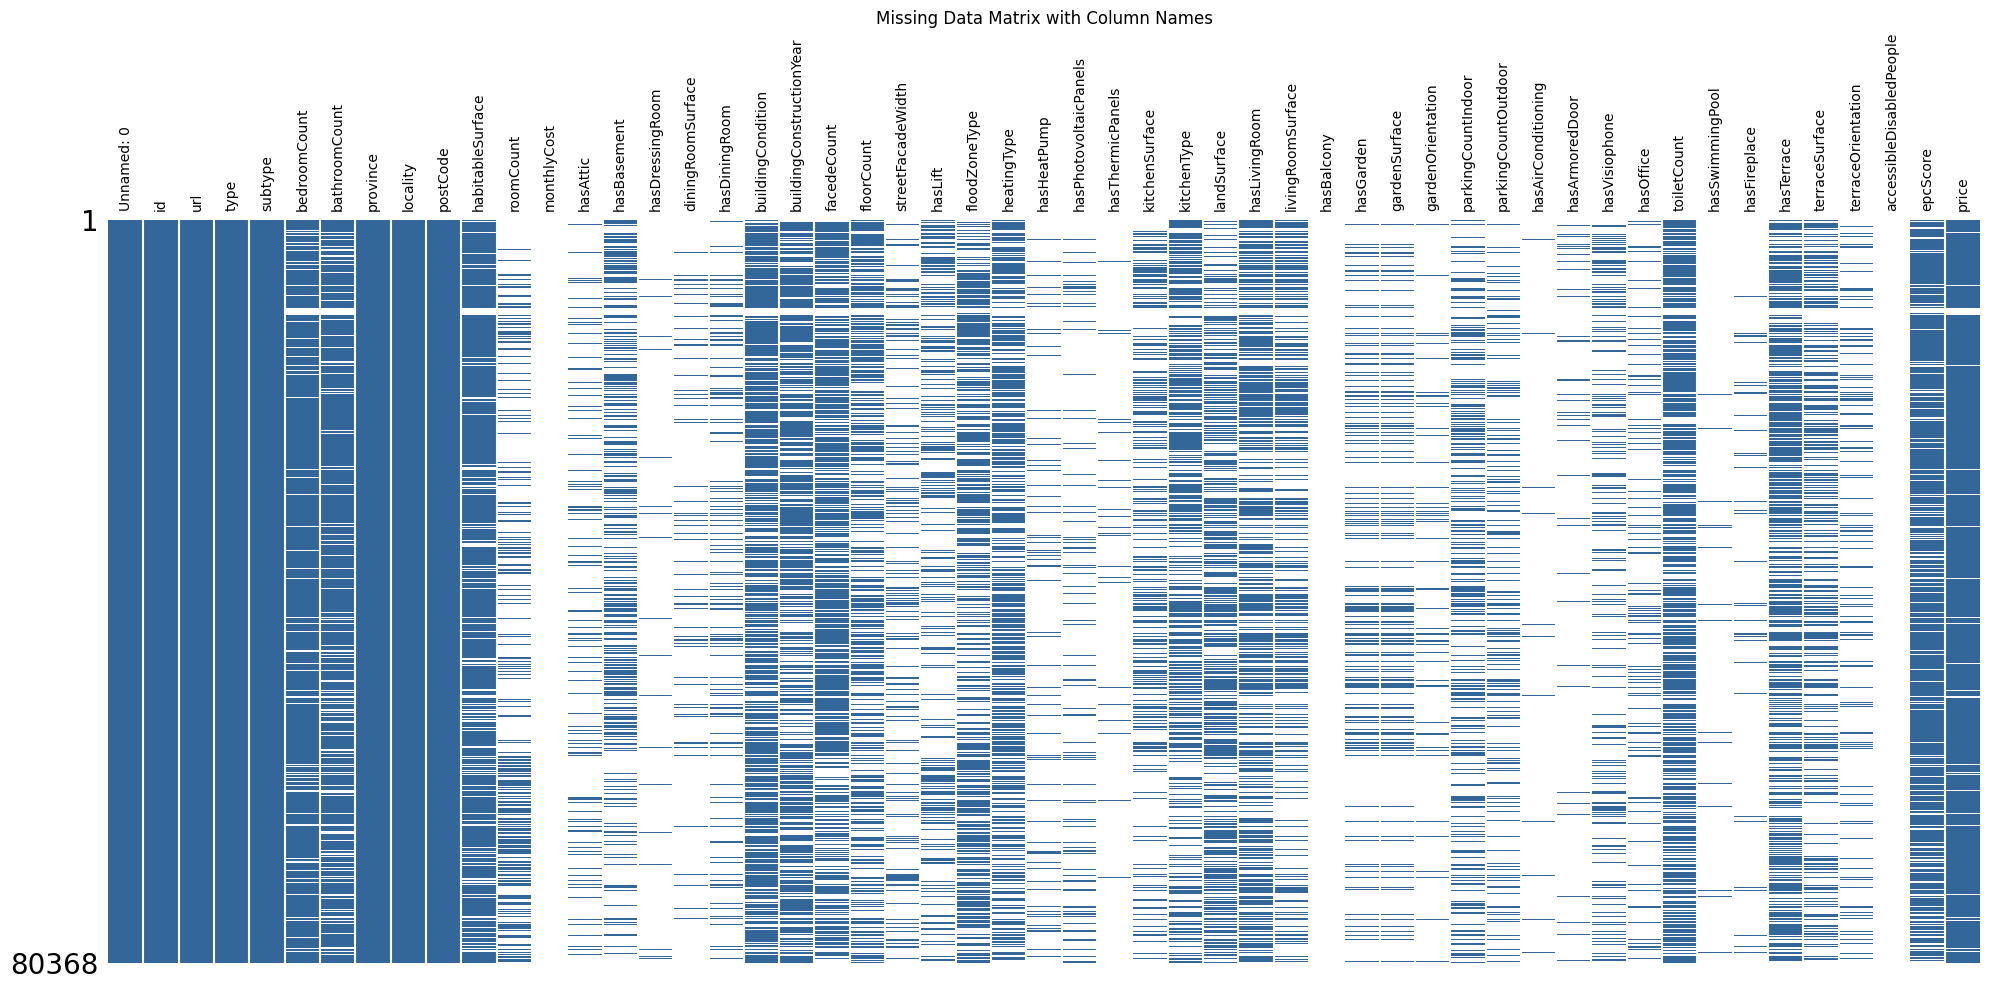

In [30]:
import missingno as msno
import matplotlib.pyplot as plt

# Plot the matrix
fig = plt.figure(figsize=(20, 10))
ax = msno.matrix(df, color=(0.2, 0.4, 0.6), figsize=(20, 10), sparkline=False)

# Manually set x-axis tick labels (only shows first ~20 by default)
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, rotation=90, fontsize=10)

plt.title("Missing Data Matrix with Column Names")
plt.tight_layout()
plt.show()

#### Approach 3 – Visualisation with missingno 

<Axes: >

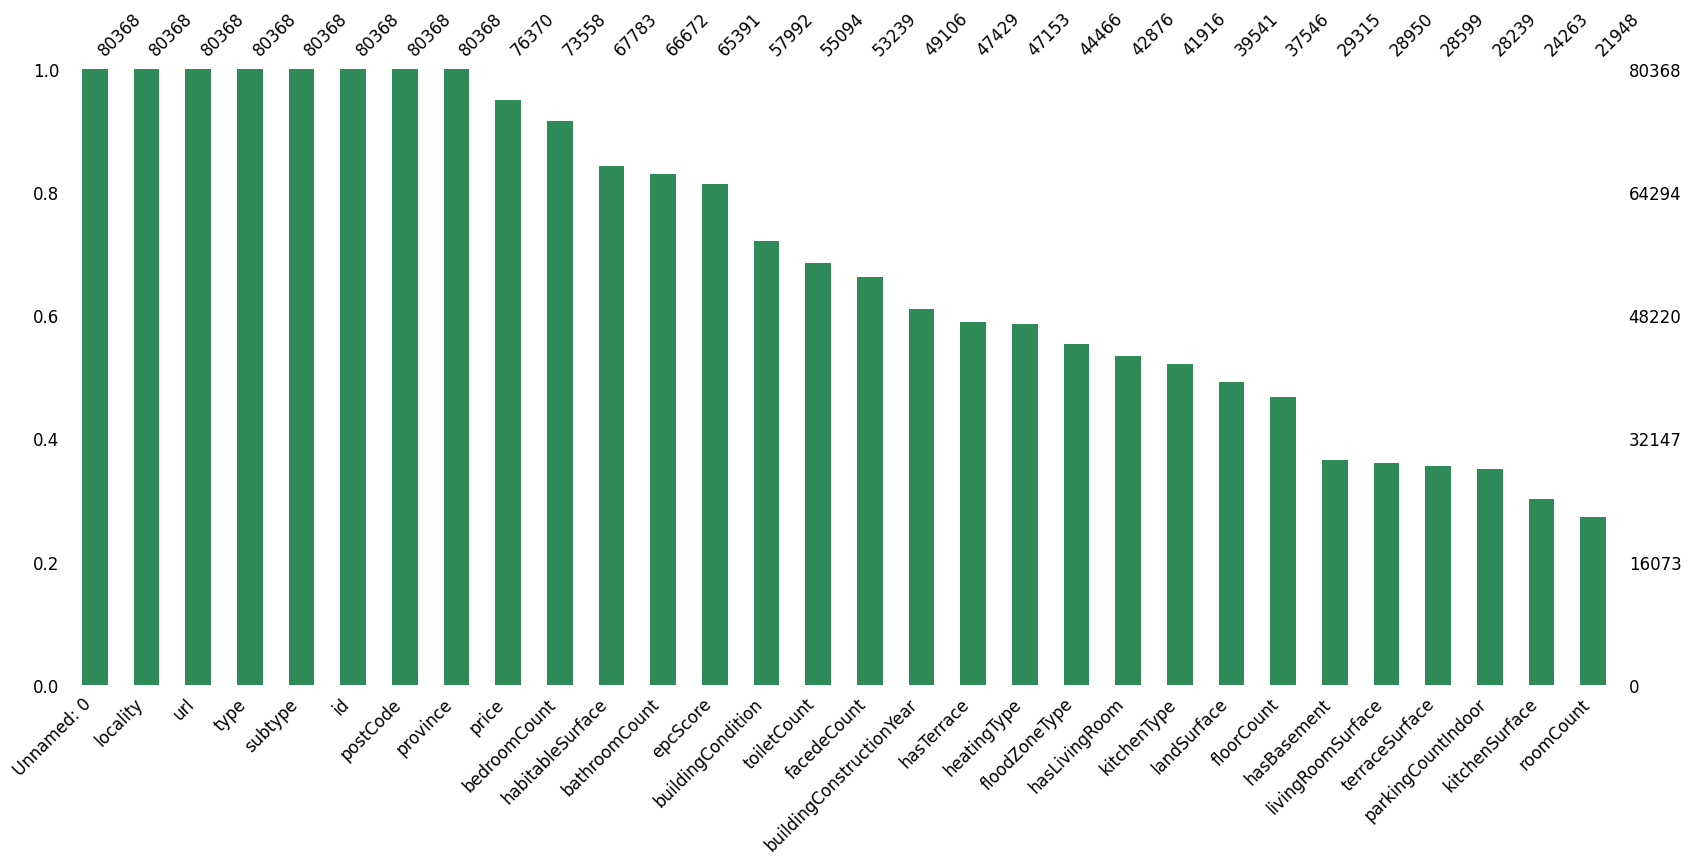

In [31]:
import missingno as msno

# Step 1 – Calculate completeness (i.e., 1 - missing rate)
completeness = 1 - df.isnull().mean()

# Step 2 – Select the 20 most complete features
top_complete_cols = completeness.sort_values(ascending=False).head(30).index

# Step 3 – Create a subset of the DataFrame with those features
df_most_complete = df[top_complete_cols]

# Step 4 – Visualize using missingno.bar (shows non-missing count per column)
msno.bar(
    df_most_complete,
    color='seagreen',        # Indicates completeness
    figsize=(20, 8),         # Adjust figure size for readability
    fontsize=12,             # Font size for axis labels
    labels=True              # Display column names
)


### Most Complete Features – Bar Chart Interpretation

The chart above displays the top 30 features with the highest data availability (i.e., the lowest percentage of missing values), sorted in descending order of completeness.

#### Key Observations:

- Several columns such as `Unnamed: 0`, `locality`, `url`, `type`, `subtype`, `id`, `postcode`, and `province` are **fully populated** (100% complete), making them highly reliable for indexing, filtering, or grouping operations.
- Core variables like `price`, `bedroomCount`, and `habitableSurface` also show near-complete coverage, confirming they are suitable for **model training and analysis without the need for imputation**.
- Columns such as `epcScore`, `buildingCondition`, `facadeCount`, `toiletCount`, and `buildingConstructionYear` are also **well-covered** (70–90%), although some may still require minimal preprocessing.
- Lower on the chart, fields like `roomCount`, `kitchenSurface`, `terraceSurface`, and `parkingCountIndoor` have **significantly more missing values** (below 60% availability) and may require imputation or cautious treatment depending on their importance.

#### Strategic Implications:

- These most complete features can serve as a **baseline** for modeling, clustering, or dashboards with minimal data preparation effort.
- The presence of both numerical and categorical features among the most complete fields offers **good diversity** for predictive modeling.
- Less complete fields at the bottom of this list should be considered **optional or secondary features** and evaluated on a case-by-case basis for inclusion.

Prioritize these high-availability columns when building early prototypes or minimal viable models to ensure robustness.


#### Approach 3 – Visualisation with missingno 

<Axes: >

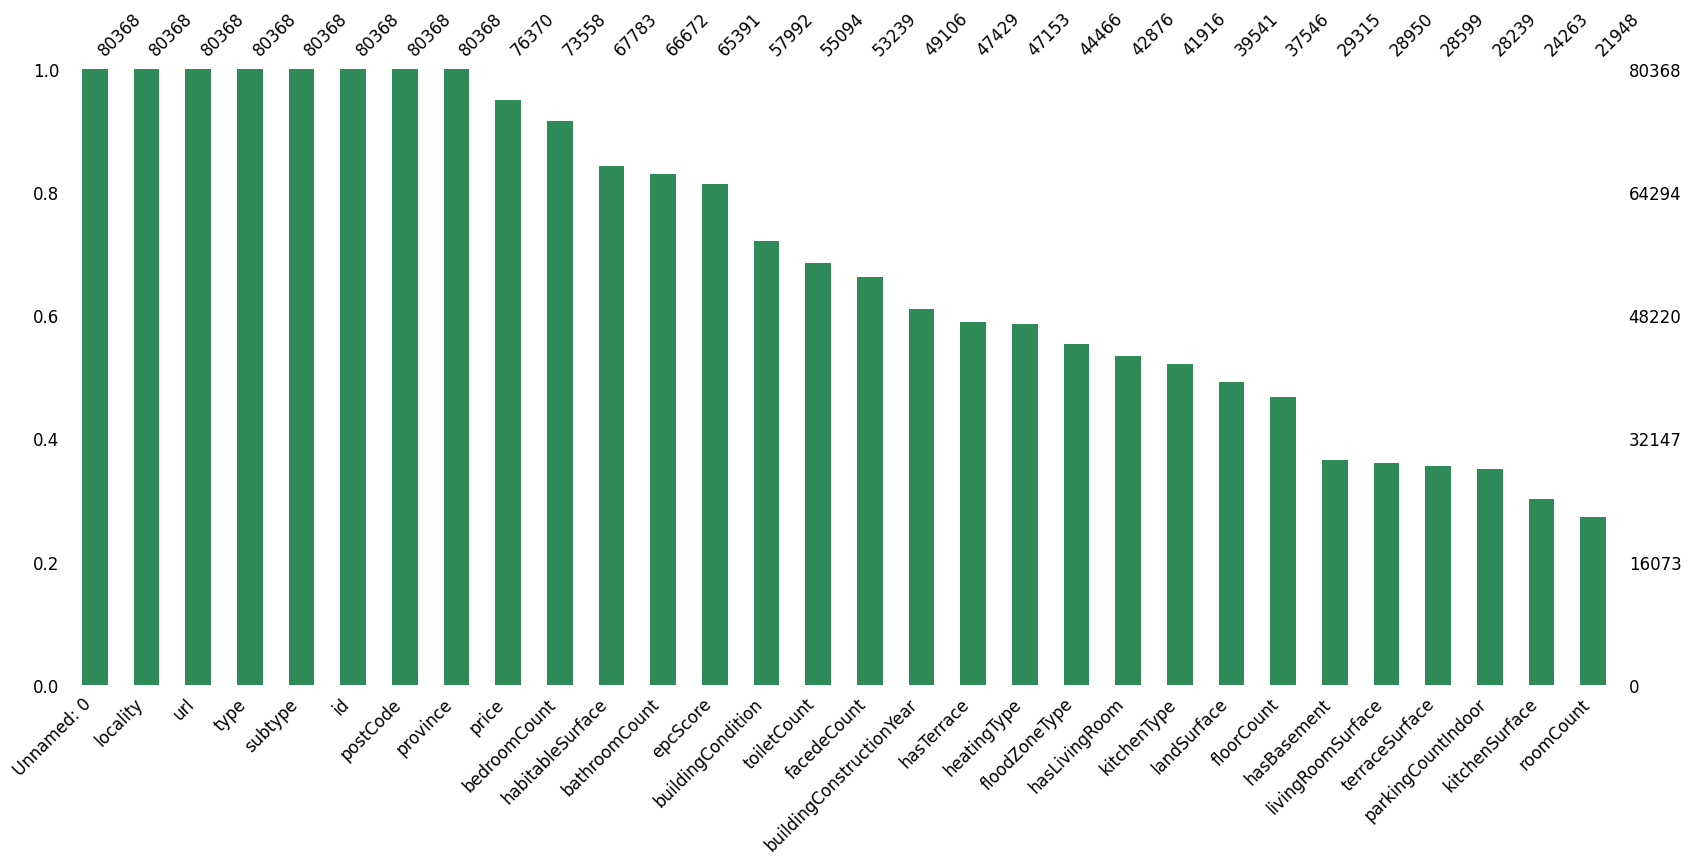

In [26]:
import missingno as msno

# Step 1 – Calculate completeness (i.e., 1 - missing rate)
completeness = 1 - df.isnull().mean()

# Step 2 – Select the 20 most complete features
top_complete_cols = completeness.sort_values(ascending=False).head(30).index

# Step 3 – Create a subset of the DataFrame with those features
df_most_complete = df[top_complete_cols]

# Step 4 – Visualize using missingno.bar (shows non-missing count per column)
msno.bar(
    df_most_complete,
    color='seagreen',        # Indicates completeness
    figsize=(20, 8),         # Adjust figure size for readability
    fontsize=12,             # Font size for axis labels
    labels=True              # Display column names
)

### 2.2.3. Save new dataset with missing values removed 
  - A. Drop columns with more than 50% missing values
  - B. Drop remaining rows with any missing value

Shape after cleaning: (4713, 22)


,Unnamed: 0,id,url,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,...,buildingConstructionYear,facedeCount,floodZoneType,heatingType,kitchenType,hasLivingRoom,toiletCount,hasTerrace,epcScore,price
0,0,20661494.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,...,2004.0,1.0,NON_FLOOD_ZONE,GAS,SEMI_EQUIPPED,True,1.0,True,C,399000.0
1,1,20647642.0,https://www.immoweb.be/en/classified/house/for...,HOUSE,HOUSE,4.0,2.0,Brussels,Etterbeek,1040,...,1910.0,2.0,NON_FLOOD_ZONE,FUELOIL,INSTALLED,True,3.0,True,E,895000.0
11,11,20577219.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,3.0,1.0,Brussels,Etterbeek,1040,...,1944.0,2.0,NON_FLOOD_ZONE,GAS,NOT_INSTALLED,True,1.0,True,E,370000.0
16,16,20638164.0,https://www.immoweb.be/en/classified/penthouse...,APARTMENT,PENTHOUSE,3.0,1.0,Brussels,Etterbeek,1040,...,1912.0,3.0,NON_FLOOD_ZONE,GAS,HYPER_EQUIPPED,True,3.0,True,B,995000.0
20,20,20634202.0,https://www.immoweb.be/en/classified/penthouse...,APARTMENT,PENTHOUSE,3.0,2.0,Brussels,Etterbeek,1040,...,1912.0,3.0,NON_FLOOD_ZONE,GAS,HYPER_EQUIPPED,True,3.0,True,C,950000.0


### Strategy by Category

#### Drop columns:
- Drop columns with **more than 50% missing values** if they are **not critical** for analysis or modeling.
- **Examples**: `garage`, `number`, `street`.

#### Impute columns:
- Use **median imputation** for numerical columns.
  - _However not applicable for_: `bathroom`, `year built`, `EPC(kWh/m<sup>2</sup>)`
- Use **regression-based imputation** when strong correlations exist between numerical features.
  - _Example_: `ground area(m<sup>2</sup>)` based on `living area(m<sup>2</sup>)`, `bedrooms`

#### Create binary flags:
- For columns with high missingness, create **binary indicator columns** to flag presence or absence of values.
  - _Examples_: `has_garage`, `has_epc`, `has_ground_area`

#### Drop rows:
- Drop rows **only if multiple critical features** are missing and the data quality is too poor to recover.

### 2.2.3. Save new dataset with missing values removed 
  - Step 1. Drop columns with more than 50% missing values
  - Step 2. Drop remaining rows with any missing value

In [47]:
# Step A – Drop columns with more than 50% missing values
threshold = 0.5
df_cleaned = df.loc[:, df.isnull().mean() < threshold]

# Step B – Drop rows that contain any remaining missing values
df_cleaned = df_cleaned.dropna()

# Optionally, save the cleaned dataset
df_cleaned.to_csv("../data/immovlan_real_estate_cleaned_dataset.csv", index=False)


# Ensure all columns are displayed in the output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)  # Optional: limit row height in preview

# Display first 20 rows with all columns
df_cleaned.head(100)

,Unnamed: 0,id,url,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,habitableSurface,buildingCondition,buildingConstructionYear,facedeCount,floodZoneType,heatingType,kitchenType,hasLivingRoom,toiletCount,hasTerrace,epcScore,price
0,0,20661494.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,100.0,GOOD,2004.0,1.0,NON_FLOOD_ZONE,GAS,SEMI_EQUIPPED,True,1.0,True,C,399000.0
1,1,20647642.0,https://www.immoweb.be/en/classified/house/for...,HOUSE,HOUSE,4.0,2.0,Brussels,Etterbeek,1040,270.0,TO_BE_DONE_UP,1910.0,2.0,NON_FLOOD_ZONE,FUELOIL,INSTALLED,True,3.0,True,E,895000.0
11,11,20577219.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,3.0,1.0,Brussels,Etterbeek,1040,119.0,TO_RENOVATE,1944.0,2.0,NON_FLOOD_ZONE,GAS,NOT_INSTALLED,True,1.0,True,E,370000.0
16,16,20638164.0,https://www.immoweb.be/en/classified/penthouse...,APARTMENT,PENTHOUSE,3.0,1.0,Brussels,Etterbeek,1040,198.0,AS_NEW,1912.0,3.0,NON_FLOOD_ZONE,GAS,HYPER_EQUIPPED,True,3.0,True,B,995000.0
20,20,20634202.0,https://www.immoweb.be/en/classified/penthouse...,APARTMENT,PENTHOUSE,3.0,2.0,Brussels,Etterbeek,1040,220.0,AS_NEW,1912.0,3.0,NON_FLOOD_ZONE,GAS,HYPER_EQUIPPED,True,3.0,True,C,950000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,683,20591505.0,https://www.immoweb.be/en/classified/house/for...,HOUSE,HOUSE,6.0,3.0,Brussels,SCHAERBEEK,1030,315.0,GOOD,1930.0,2.0,NON_FLOOD_ZONE,GAS,INSTALLED,True,4.0,True,F,990000.0
691,693,20611054.0,https://www.immoweb.be/en/classified/flat-stud...,APARTMENT,FLAT_STUDIO,1.0,1.0,Brussels,Schaerbeek,1030,43.0,GOOD,1970.0,2.0,NON_FLOOD_ZONE,GAS,INSTALLED,True,1.0,True,D,243000.0
692,694,20561059.0,https://www.immoweb.be/en/classified/penthouse...,APARTMENT,PENTHOUSE,3.0,2.0,Brussels,Schaarbeek,1030,110.0,GOOD,2008.0,2.0,NON_FLOOD_ZONE,GAS,HYPER_EQUIPPED,True,2.0,True,D,520000.0
699,701,20591844.0,https://www.immoweb.be/en/classified/mansion/f...,HOUSE,MANSION,6.0,3.0,Brussels,Schaerbeek,1030,315.0,AS_NEW,1910.0,2.0,NON_FLOOD_ZONE,GAS,HYPER_EQUIPPED,True,4.0,True,F,990000.0


# 3. Exploratory data analysis (EDA) 
- 3.1. Variable Types: Quantitative vs Qualitative
- 3.2. Descriptive Statistics (Mean, Median, etc.)
- 3.3. Distribution Visualizations
  - Histograms
  - Boxplots
- 3.4. Correlation Matrix & Heatmap
- 3.5. Outlier Detection

## 3.1. Identify variable types in the cleaned dataset
- **Quantitative variables** are numerical and can be used in mathematical operations, plots, and statistical summaries.
- **Qualitative variables** (also called categorical) describe categories or labels and often require encoding or grouping before use in machine learning.


In [38]:
# Separate columns by dtype
quantitative_cols = df_cleaned.select_dtypes(include=["int64", "float64"]).columns.tolist()
qualitative_cols = df_cleaned.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("Quantitative variables (numerical):")
print(quantitative_cols)

print("\nQualitative variables (categorical):")
print(qualitative_cols)

Quantitative variables (numerical):
['Unnamed: 0', 'id', 'bedroomCount', 'bathroomCount', 'postCode', 'habitableSurface', 'buildingConstructionYear', 'facedeCount', 'toiletCount', 'price']

Qualitative variables (categorical):
['url', 'type', 'subtype', 'province', 'locality', 'buildingCondition', 'floodZoneType', 'heatingType', 'kitchenType', 'hasLivingRoom', 'hasTerrace', 'epcScore']


## 3.2. Descriptive Statistics for Quantitative Variables

In [39]:
# Identify quantitative columns
quantitative_cols = df_cleaned.select_dtypes(include=["int64", "float64"]).columns

# Compute descriptive statistics
desc_stats = df_cleaned[quantitative_cols].describe().T

# Add median separately
desc_stats["median"] = df_cleaned[quantitative_cols].median()

# Round for readability
desc_stats = desc_stats.round(2)

# Display
display(desc_stats)

,count,mean,std,min,25%,50%,75%,max,median
Unnamed: 0,4713.0,154414.02,114278.67,0.0,11269.0,183261.0,238961.0,440364.0,183261.0
id,4713.0,19989260.74,2156456.31,9332176.0,20402299.0,20546776.0,20618820.0,20664347.0,20546776.0
bedroomCount,4713.0,3.22,1.49,1.0,2.0,3.0,4.0,25.0,3.0
bathroomCount,4713.0,1.50,0.93,1.0,1.0,1.0,2.0,14.0,1.0
postCode,4713.0,3947.34,2820.94,1000.0,1410.0,2940.0,6180.0,9990.0,2940.0
habitableSurface,4713.0,188.32,135.21,26.0,105.0,155.0,225.0,3412.0,155.0
buildingConstructionYear,4713.0,1966.85,40.58,1757.0,1948.0,1970.0,1998.0,2026.0,1970.0
facedeCount,4713.0,2.85,0.88,1.0,2.0,3.0,4.0,8.0,3.0
toiletCount,4713.0,1.97,1.15,1.0,1.0,2.0,2.0,17.0,2.0
price,4713.0,505254.29,477669.56,59000.0,265000.0,375000.0,569000.0,6950000.0,375000.0


### 3.3. Distribution Visualizations
  - Histograms
  - Boxplots

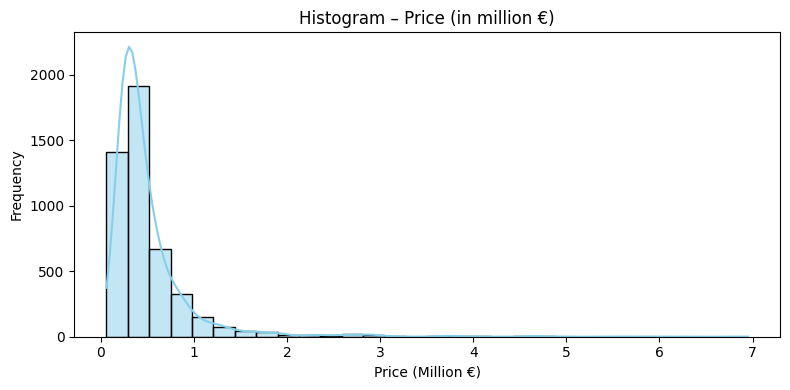

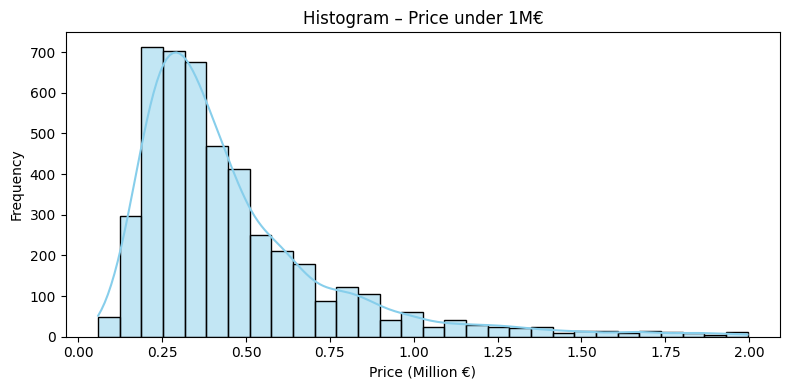

In [48]:

# Copie temporaire pour transformation
df_temp = df_cleaned.copy()

# Convert 'price' to millions of euros
df_temp["price_million"] = df_temp["price"] / 1e6

# Histogram for all prices
plt.figure(figsize=(8, 4))
sns.histplot(df_temp["price_million"], kde=True, bins=30, color="skyblue")
plt.title("Histogram – Price (in million €)")
plt.xlabel("Price (Million €)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Filter for prices < 1 million €
df_under_1m = df_temp[df_temp["price"] < 2_000_000]

# Histogram for prices < 1M€
plt.figure(figsize=(8, 4))
sns.histplot(df_under_1m["price_million"], kde=True, bins=30, color="skyblue")
plt.title("Histogram – Price under 1M€")
plt.xlabel("Price (Million €)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


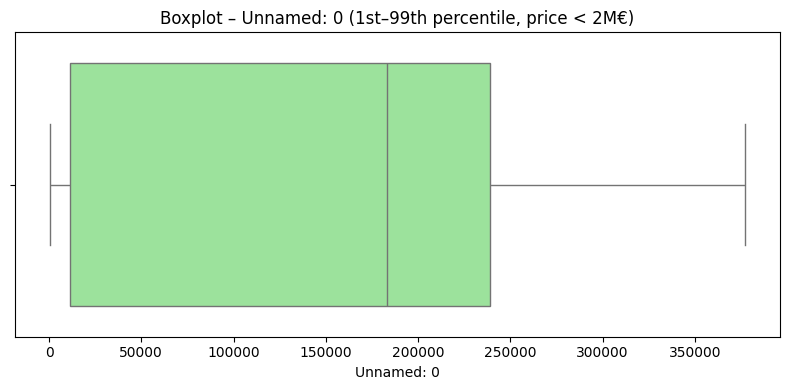

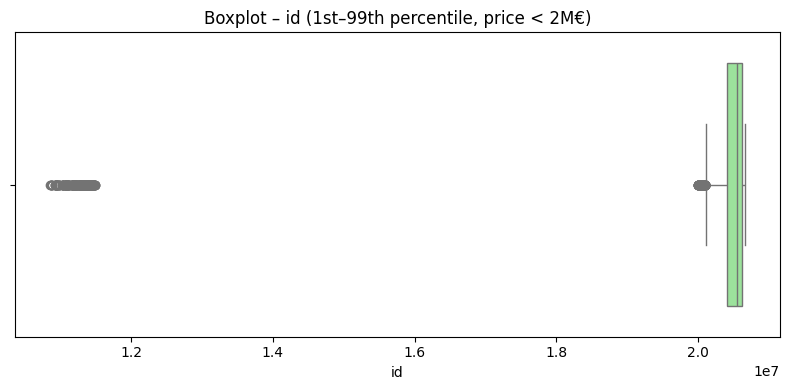

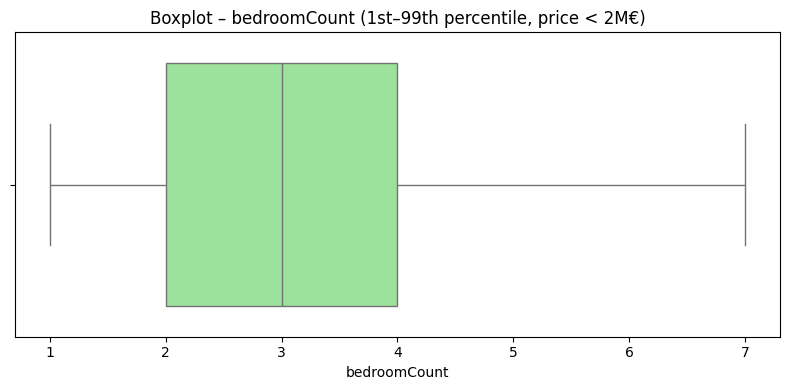

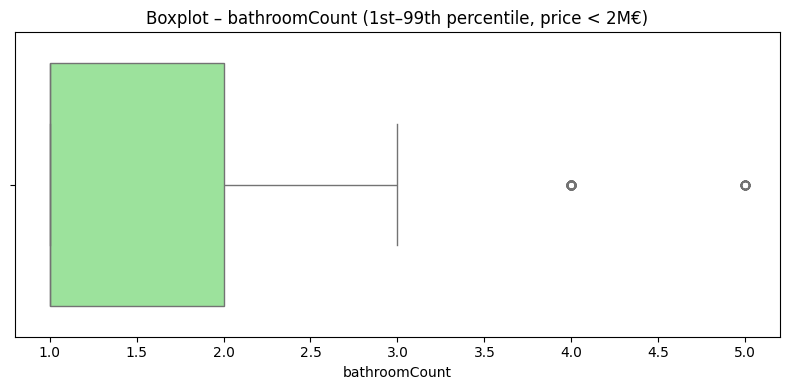

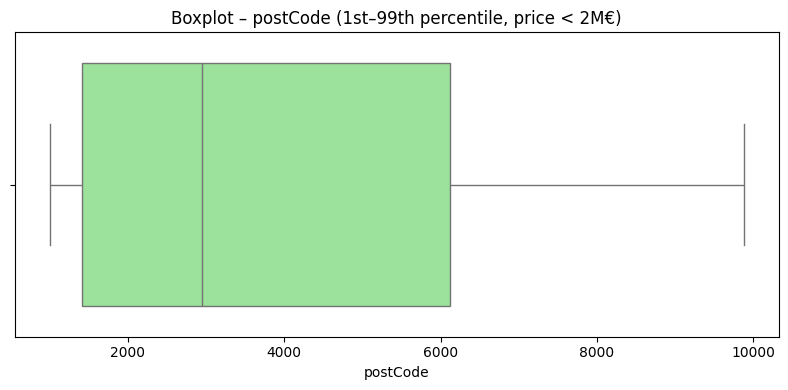

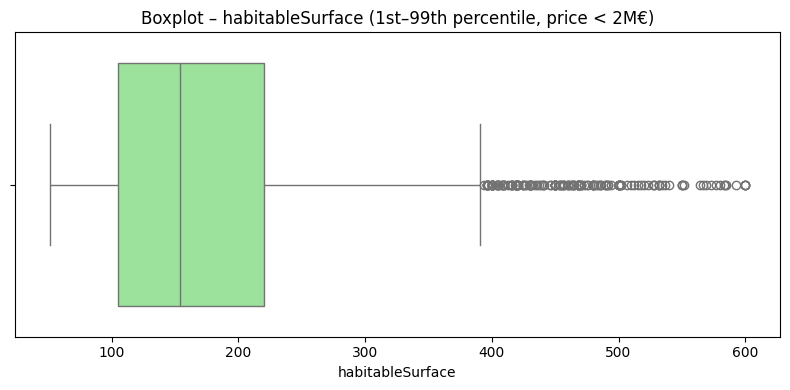

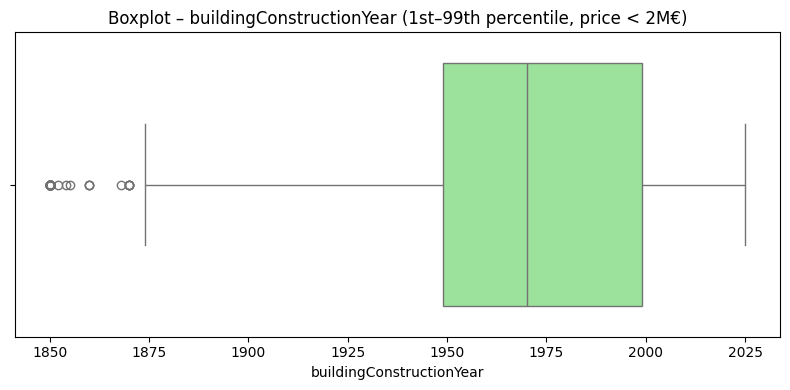

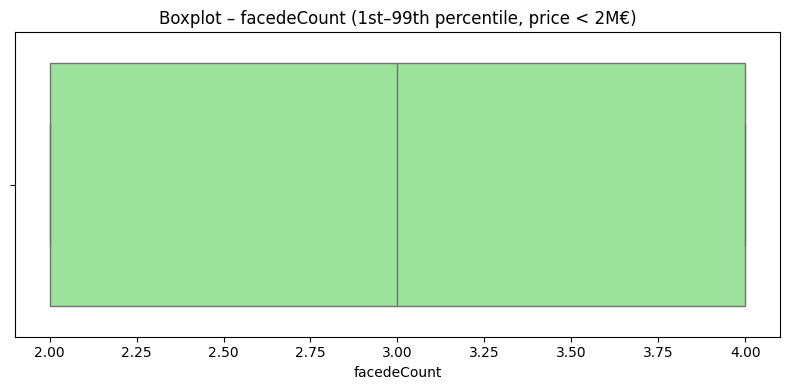

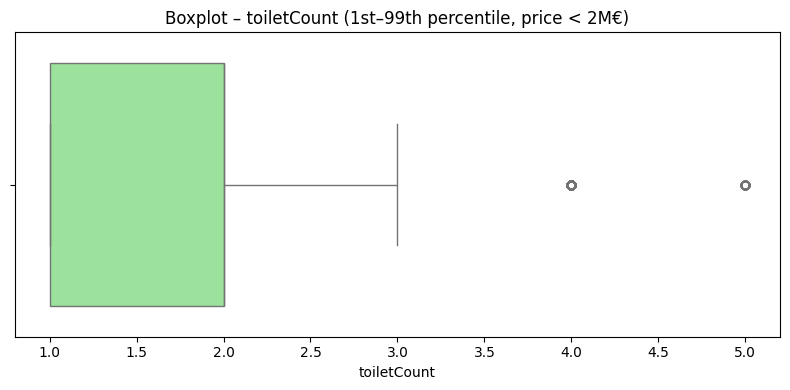

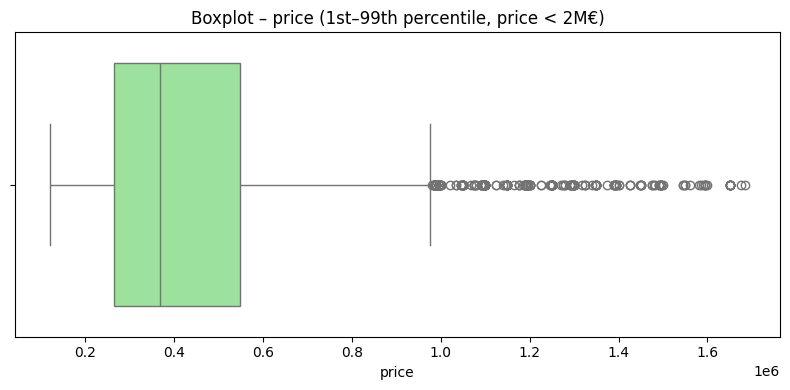

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset to include only properties priced under 2 million euros
df_filtered = df_cleaned[df_cleaned["price"] < 2_000_000]

# Identify numerical (quantitative) variables
quantitative_cols = df_filtered.select_dtypes(include=["int64", "float64"]).columns

# Plot boxplots for each numerical variable (trimmed to 1st–99th percentile)
for col in quantitative_cols:
    # Skip if the column has too few unique values (not meaningful)
    if df_filtered[col].nunique() <= 1:
        continue

    # Compute the 1st and 99th percentiles
    lower = df_filtered[col].quantile(0.01)
    upper = df_filtered[col].quantile(0.99)

    # Trim values to reduce influence of extreme outliers
    df_trimmed = df_filtered[(df_filtered[col] >= lower) & (df_filtered[col] <= upper)]

    # Skip if trimming results in empty or constant data
    if df_trimmed[col].nunique() <= 1:
        continue

    # Plot the boxplot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_trimmed[col], color="lightgreen")
    plt.title(f"Boxplot – {col} (1st–99th percentile, price < 2M€)")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


# 4. Guided analysis and visual questions  
- 4.1. Most & Least Expensive 
  - Per town
  - Per province
  - By selecting Belgium, Wallonia, Flanders
  - Avg / Median / Price per m<sup>2</sup>
-  4.2. Most Influential Variables on Price
-  4.3. Variables with Low or No Impact
-  4.4. Histogram: Properties by Surface
-  4.5. Encoding Strategy for Categorical Variables

## 4.1. Most & Least Expensive per town

C:\Users\Neo\AppData\Local\Temp\ipykernel_39836\3951217809.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


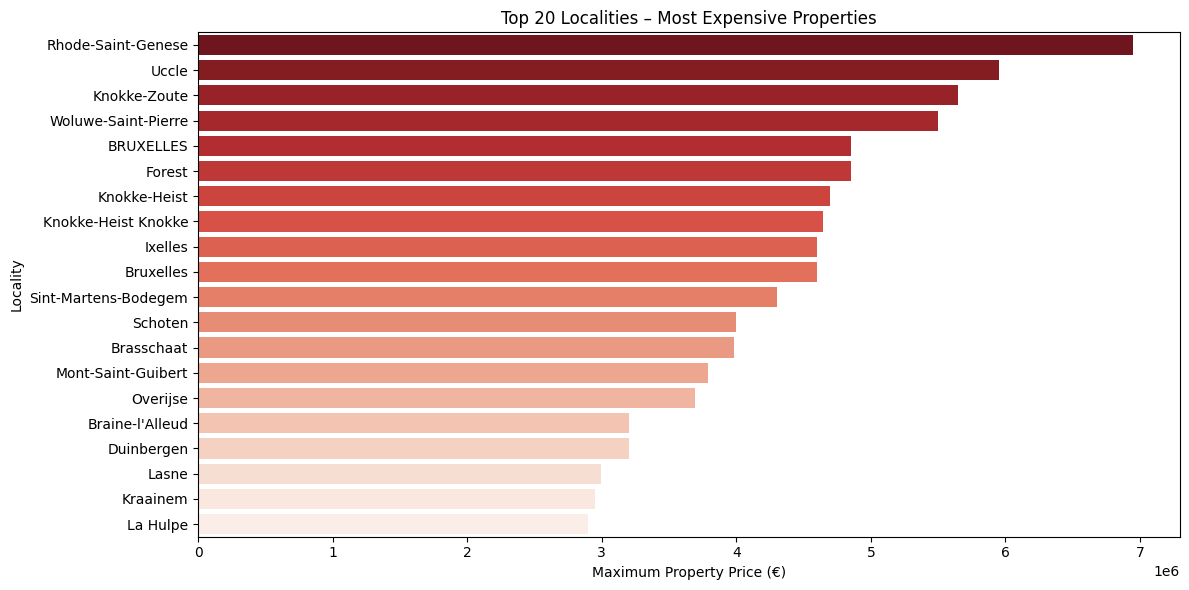

C:\Users\Neo\AppData\Local\Temp\ipykernel_39836\3951217809.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


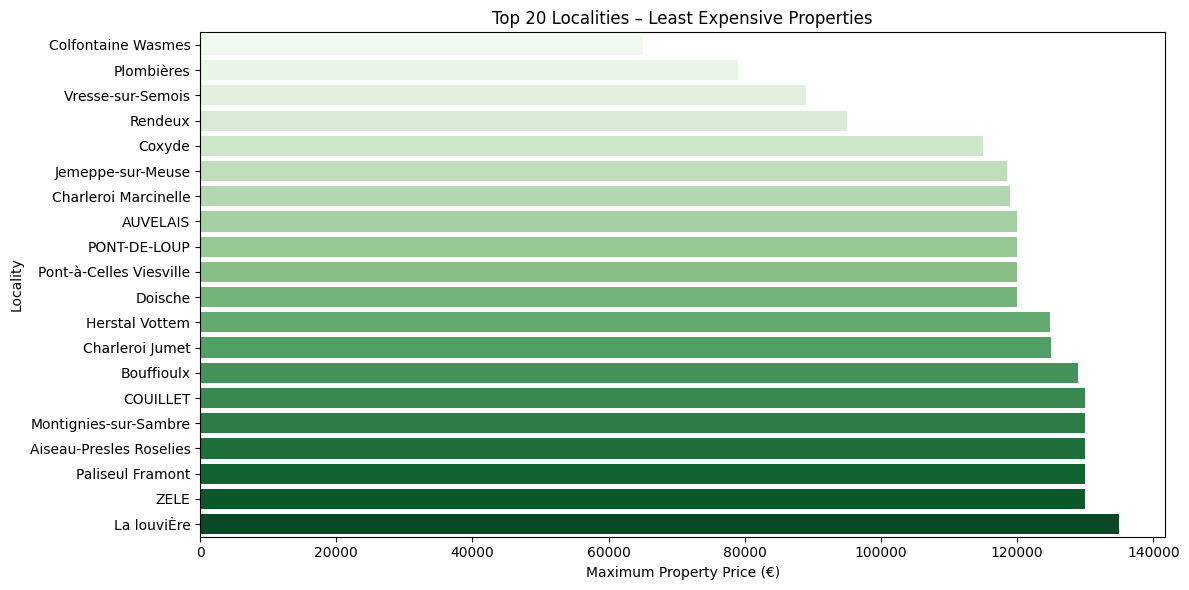

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy to avoid modifying the original DataFrame
df_cleaned = df_cleaned.copy()

# Create a new column for price per square meter
df_cleaned["price_per_m2"] = df_cleaned["price"] / df_cleaned["habitableSurface"]

# Group statistics by locality (used as a proxy for city)
city_price_stats = df_cleaned.groupby("locality").agg(
    max_price=("price", "max"),
    min_price=("price", "min"),
    avg_price=("price", "mean"),
    median_price=("price", "median"),
    avg_price_per_m2=("price_per_m2", "mean"),
    property_count=("price", "count")
).sort_values("max_price", ascending=False)

# Select the top 20 most expensive localities
top_expensive_cities = city_price_stats.head(20)

# Select the 20 least expensive localities
least_expensive_cities = city_price_stats.sort_values("max_price").head(20)

# Plot most expensive cities with unique colors per bar
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_expensive_cities,
    x="max_price",
    y=top_expensive_cities.index,
    palette=sns.color_palette("Reds_r", len(top_expensive_cities))  # red shades
)
plt.title("Top 20 Localities – Most Expensive Properties")
plt.xlabel("Maximum Property Price (€)")
plt.ylabel("Locality")
plt.tight_layout()
plt.show()

# Plot least expensive cities with unique colors per bar
plt.figure(figsize=(12, 6))
sns.barplot(
    data=least_expensive_cities,
    x="max_price",
    y=least_expensive_cities.index,
    palette=sns.color_palette("Greens", len(least_expensive_cities))  # green shades
)
plt.title("Top 20 Localities – Least Expensive Properties")
plt.xlabel("Maximum Property Price (€)")
plt.ylabel("Locality")
plt.tight_layout()
plt.show()



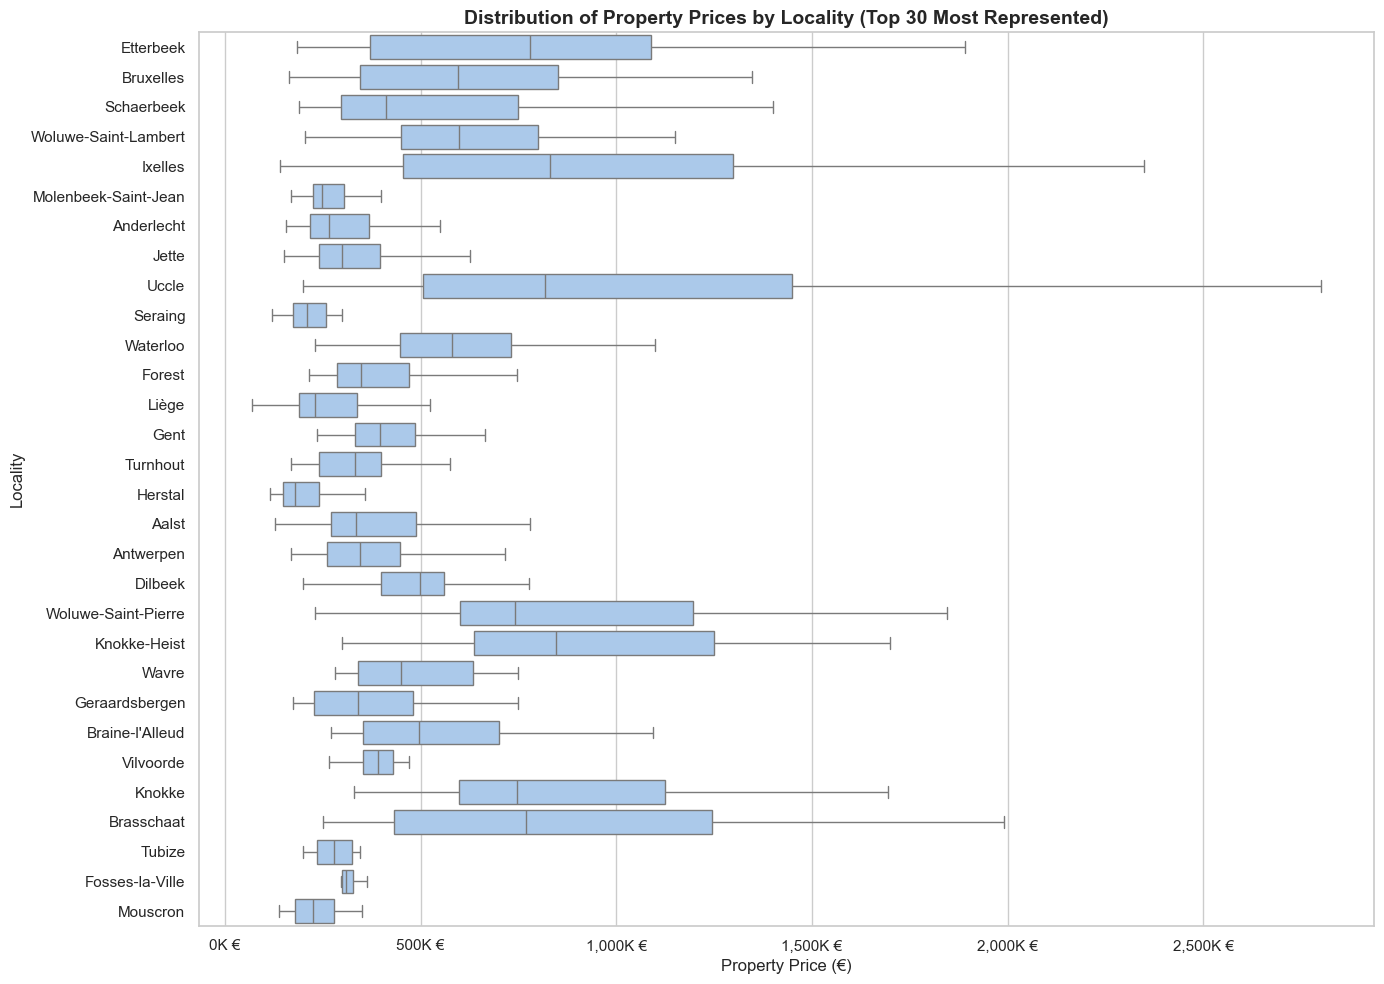

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Step 1 – Keep only the 30 most represented localities
top_localities = df_cleaned["locality"].value_counts().nlargest(30).index
df_top = df_cleaned[df_cleaned["locality"].isin(top_localities)]

# Step 2 – Plot boxplots of price distribution per locality
plt.figure(figsize=(14, 10))  # Taller to fit 30 labels
sns.set(style="whitegrid", palette="pastel")

ax = sns.boxplot(
    data=df_top,
    y="locality",
    x="price",
    orient="h",
    showfliers=False  # Remove extreme outliers for clarity
)

# Format x-axis labels as thousands in €
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x / 1000):,}K €"))

# Add labels and title
plt.title("Distribution of Property Prices by Locality (Top 30 Most Represented)", fontsize=14, weight='bold')
plt.xlabel("Property Price (€)", fontsize=12)
plt.ylabel("Locality", fontsize=12)

plt.tight_layout()
plt.show()



In [ ]:
## 4.1. Most & Least Expensive per province

Provinces found in the dataset:
['Antwerp' 'Brussels' 'East Flanders' 'Flemish Brabant' 'Hainaut'
 'Limburg' 'Liège' 'Luxembourg' 'Namur' 'Walloon Brabant' 'West Flanders']
Number of provinces found: 11


C:\Users\Neo\AppData\Local\Temp\ipykernel_39836\1950051231.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


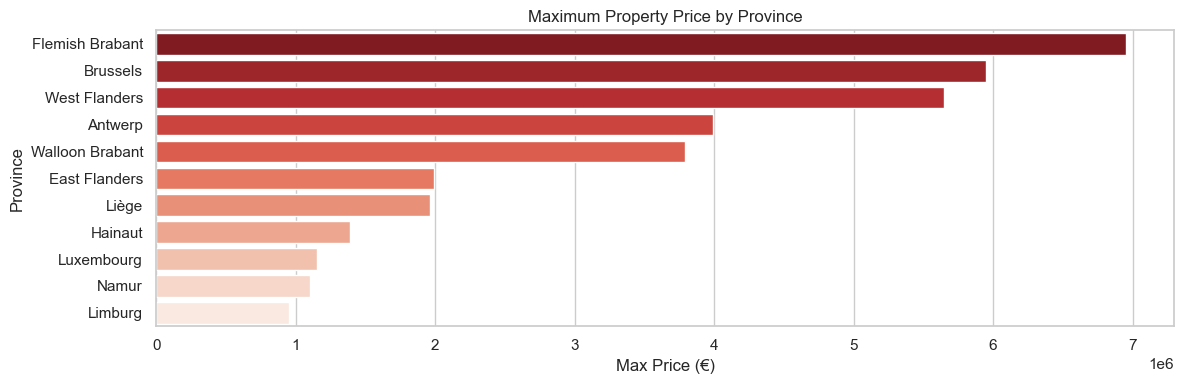

C:\Users\Neo\AppData\Local\Temp\ipykernel_39836\1950051231.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


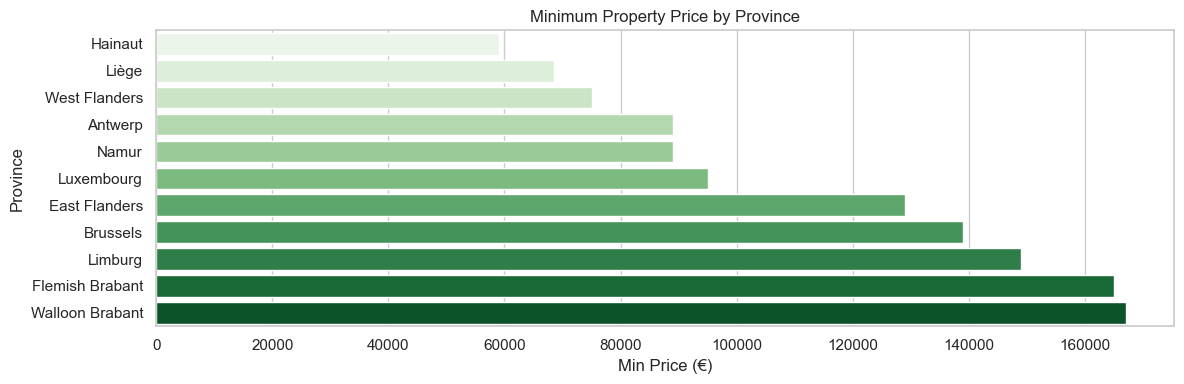

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Remove rows with missing or invalid living area to avoid division by zero
df_prov = df_cleaned[df_cleaned["habitableSurface"] > 0].copy()

# Compute price per m²
df_prov["price_per_m2"] = df_prov["price"] / df_prov["habitableSurface"]

# Group by province and compute aggregated statistics
province_stats = df_prov.groupby("province").agg(
    max_price=("price", "max"),
    min_price=("price", "min"),
    mean_price=("price", "mean"),
    median_price=("price", "median"),
    avg_price_per_m2=("price_per_m2", "mean"),
    listing_count=("price", "count")
).reset_index()

# Print provinces present in the dataset
print("Provinces found in the dataset:")
print(province_stats["province"].unique())
print(f"Number of provinces found: {province_stats['province'].nunique()}")

# === Plot: Maximum property price by province ===
province_max_sorted = province_stats.sort_values("max_price", ascending=False)
plt.figure(figsize=(12, 4))
sns.barplot(
    data=province_max_sorted,
    x="max_price",
    y="province",
    palette="Reds_r"
)
plt.title("Maximum Property Price by Province")
plt.xlabel("Max Price (€)")
plt.ylabel("Province")
plt.tight_layout()
plt.show()

# === Plot: Minimum property price by province ===
province_min_sorted = province_stats.sort_values("min_price", ascending=True)
plt.figure(figsize=(12, 4))
sns.barplot(
    data=province_min_sorted,
    x="min_price",
    y="province",
    palette="Greens"
)
plt.title("Minimum Property Price by Province")
plt.xlabel("Min Price (€)")
plt.ylabel("Province")
plt.tight_layout()
plt.show()


# 5. Interpretation and Business Insights

## 5.1. Summary of Key Findings

- Property prices vary significantly by region and locality, with Antwerp and Brussels showing the highest price ranges.
- Some provinces offer more affordable opportunities, reflected in lower minimum prices.
- Not all provinces are fully represented in the dataset, limiting the geographic coverage and representativeness of the analysis.
- Missing data in several key features may affect the accuracy and robustness of pricing insights.

## 5.2. Business Recommendations for ImmoEliza

- Focus marketing and lead generation efforts in high-value regions to attract premium listings.
- Highlight and promote affordable housing options in lower-priced provinces to capture a wider customer base.
- Improve data collection and completeness, especially for critical features such as surface area and number of rooms, to strengthen predictive pricing models and client trust.

## 5.3. Data Limitations

- Several features have high missing rates, which may introduce bias or reduce model reliability.
- The dataset excludes some towns and provinces, possibly due to incomplete or unnormalized geographic data.
- Extreme outliers and missing values in numerical features limit the precision of descriptive and comparative analysis.
